### The dataset I am scrapping is from news api about news article about asthma and if possible covering area of California attached to it. So, I am passing parameters as to be both Asthma related and in the area of California. 

In [23]:
import requests
url = 'https://newsapi.org/v2/everything'

params = {'q': 'asthma AND california',
    'apiKey': "d4a8ed55ba264ae89c11c1e3f7ee595b",
          "language": "en"
               }

request = requests.get(url,params)
data = request.json()

In [24]:
data

{'status': 'ok',
 'totalResults': 75,
 'articles': [{'source': {'id': 'time', 'name': 'Time'},
   'author': 'Markham Heid',
   'title': 'The Most Exciting New Advances in Managing COPD',
   'description': 'From innovative new lung valves to refinements in the deployment of inhaled therapies and vaccines, the landscape of COPD care and treatment is changing.',
   'url': 'https://time.com/6903546/copd-treatment-advances/',
   'urlToImage': 'https://api.time.com/wp-content/uploads/2024/03/GettyImages-1210786663.jpg?quality=85',
   'publishedAt': '2024-03-18T14:55:58Z',
   'content': 'The Global Initiative for Chronic Obstructive Lung Disease, or GOLD, is the worlds preeminent COPD research and advocacy organization. Founded in 1997 in collaboration with the U.S. National Institut… [+11161 chars]'},
  {'source': {'id': None, 'name': 'Yahoo Entertainment'},
   'author': 'ELLIOT SPAGAT',
   'title': "Judge questions Border Patrol stand that it's not required to care for children at migrant c

In [25]:
title = []
description = []
source = []
date_published = []
content = []

In [26]:
import re
from datetime import datetime

#Doing this because we want to insert Null value if we find nothing as title, description, source, date or content
for article in data["articles"]:
    title_text = article.get("title", None)
    description_text = article.get("description", None)
    source_text = article["source"].get("name", None)
    date_published_text = article.get("publishedAt", None)
    content_text = article.get("content", None)

    if title_text is not None:
        title.append(re.sub(r"[^A-Za-z\-]", " ", title_text))
    else:
        title.append(None)

    if description_text is not None:
        description.append(re.sub(r"[^A-Za-z\-]", " ", description_text))
    else:
        description.append(None)

    if source_text is not None:
        source.append(re.sub(r"[^A-Za-z\-]", " ", source_text))
    else:
        source.append(None)
        
    if date_published_text is not None:
        date_pattern = r'^(\d{4}-\d{2}-\d{2})'
        
        match = re.search(date_pattern, date_published_text)

        if match:
            # Extract the date from the matched group
            dt = match.group(1)
            date_published.append(dt)
        else:
            continue
    else:
        date_published.append(None)

    if content_text is not None:
        content.append(re.sub(r"[^A-Za-z\-]", " ", content_text))
    else:
        content.append(None)

In [27]:
content #this has last ending with 'chars ' which needs to be removed else can be a outlier in the visualizations

['The Global Initiative for Chronic Obstructive Lung Disease  or GOLD  is the worlds preeminent COPD research and advocacy organization  Founded in      in collaboration with the U S  National Institut          chars ',
 'SAN DIEGO  AP  A federal judge on Friday sharply questioned the Biden administration s position that it bears no responsibility for housing and feeding migrant children while they wait in makeshift c         chars ',
 'A new study finds that policies to reduce carbon dioxide  CO   emissions from motor vehicles combined with investments in electric vehicles and public transportation would reduce air pollution and br         chars ',
 'Yoshiki s involvement in philanthropy encompasses a diverse range of causes  with his family and upbringing being core influences    I lost my father when I was young   Yoshiki says   He actually too         chars ',
 'Two chemicals found in common household products like disinfectants and furniture may play a role in the development of n

In [28]:
for i in range(len(content)):
    content[i] = content[i].replace("chars ", "")
    
content

['The Global Initiative for Chronic Obstructive Lung Disease  or GOLD  is the worlds preeminent COPD research and advocacy organization  Founded in      in collaboration with the U S  National Institut          ',
 'SAN DIEGO  AP  A federal judge on Friday sharply questioned the Biden administration s position that it bears no responsibility for housing and feeding migrant children while they wait in makeshift c         ',
 'A new study finds that policies to reduce carbon dioxide  CO   emissions from motor vehicles combined with investments in electric vehicles and public transportation would reduce air pollution and br         ',
 'Yoshiki s involvement in philanthropy encompasses a diverse range of causes  with his family and upbringing being core influences    I lost my father when I was young   Yoshiki says   He actually too         ',
 'Two chemicals found in common household products like disinfectants and furniture may play a role in the development of neurological disorders li

In [29]:
import pandas as pd

d = {'title' : title,
'description' : description,
'source' : source,
'date_published' : date_published,
'content' : content
    }

df = pd.DataFrame(d)

In [30]:
df.head()

,title,description,source,date_published,content
0,The Most Exciting New Advances in Managing COPD,From innovative new lung valves to refinements...,Time,2024-03-18,The Global Initiative for Chronic Obstructive ...
1,Judge questions Border Patrol stand that it s ...,A federal judge on Friday sharply questioned t...,Yahoo Entertainment,2024-03-29,SAN DIEGO AP A federal judge on Friday sharp...
2,Climate policies to reduce motor vehicle emiss...,A new study finds that policies to reduce carb...,Phys Org,2024-03-12,A new study finds that policies to reduce carb...
3,Yoshiki s Charitable Efforts Tackle Mental Hea...,Yoshiki s involvement in philanthropy encompas...,Variety,2024-03-27,Yoshiki s involvement in philanthropy encompas...
4,Chemicals Found In Popular Household Products ...,That s how many people globally have multiple ...,Forbes,2024-03-25,Two chemicals found in common household produc...


In [31]:
df['date_published'] = pd.to_datetime(df.date_published, format='%Y-%m-%d')

In [32]:
len(df)

75

In [33]:
#Let's check for any missing value and if found any, let's deal with it
df.isna().sum() # No missing value found and hence the data is ready for visualization!

title             0
description       0
source            0
date_published    0
content           0
dtype: int64

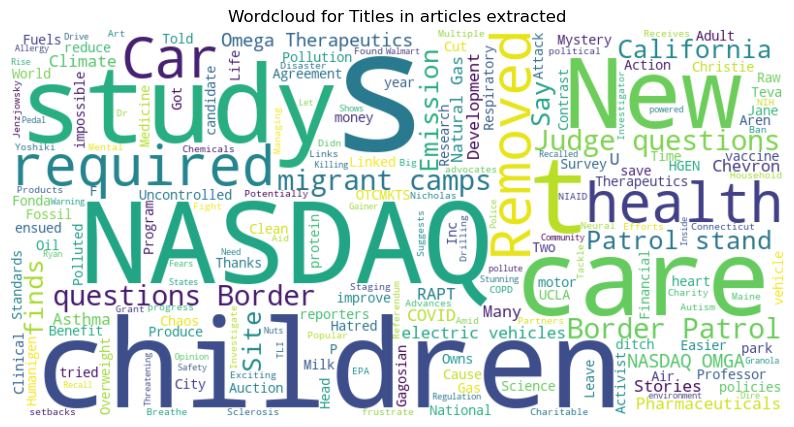

In [34]:
# Let's make word clouds of Title, Description and content, so we can depict or bring some conclusions on which words 
# or terms are being used more as a part of news on Asthma and California

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['title']))

#Word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Titles in articles extracted")
plt.axis('off')
plt.show()

From the titles we can see that Engines, smoke, emissions, trucks, Health, vaping, these words are repeating themselves. We can slightly move towards hypothesis that might be because of Pollution or due to some fire hazard or people leading to smoking or vaping might be some reasons behind Asthma being the cases in California

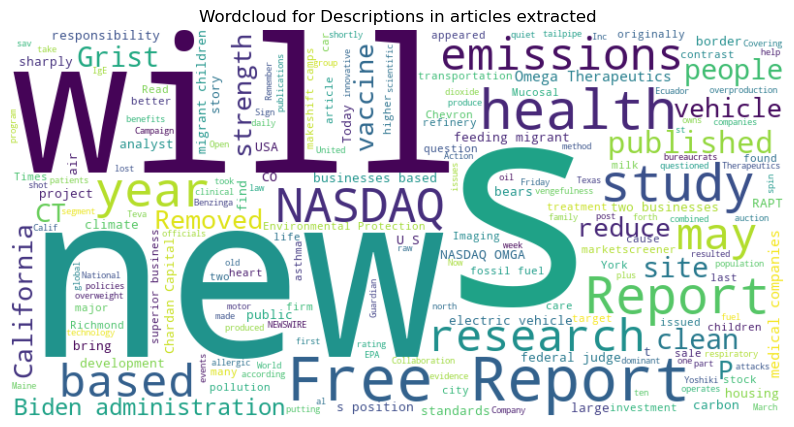

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['description']))

#Word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Descriptions in articles extracted")
plt.axis('off')
plt.show()

Moving to description, we can see that words like federal, company, trucks and settlement are the words coming more often. Now, this might be because of some legal lawsuit filed against company or company leading to settlements because of their mistakes, that made several age groups caused asthma in California. These are just rough guesses one can made from the wordcloud based on asthma and california

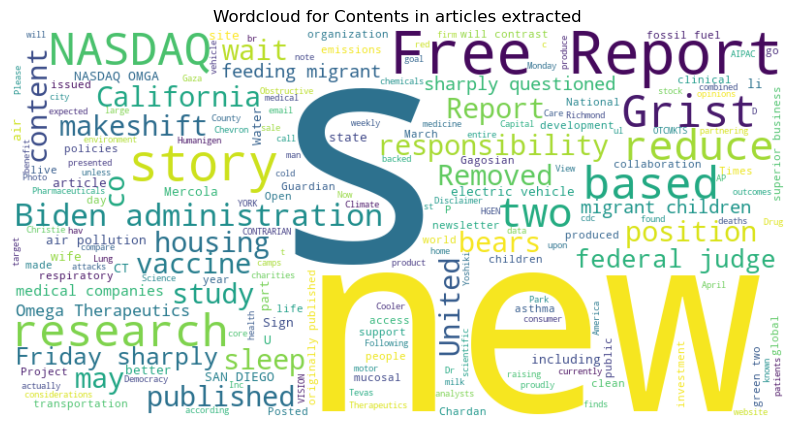

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['content']))

#Word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Contents in articles extracted")
plt.axis('off')
plt.show()

In the content as well, we can see the same things as description. One thing to notice was, Los Angeles and California was included in this list. So, this might be a case where Los Angeles was majorly affected through Asthma or through pollution or some fire hazard that is leading towards the settlement or federal report or lawsuit or something. More clarity can be made once we use other datasets into this and see if the people are getting affected and if yes of which age groups and how serious it is!

In [37]:
#Let's see what are the sources of these news, are they some well knowned or some local news. Well known ones are
#less likely to miss out some details and mostly gives us some credible news

#Let's first see how many sources are there

df['source'].unique()  #These are so many of them... Lets see the top ones.. 

array(['Time', 'Yahoo Entertainment', 'Phys Org', 'Variety', 'Forbes',
       'Science Daily', 'Nakedcapitalism com', ' Removed ', 'ARTnews',
       'Observer', 'Energycentral com', 'GlobeNewswire', 'Newsweek',
       'Prismreports org', 'Naturalnews com', 'Allthatsinteresting com',
       'Quartz India', 'Gizmodo com', 'Wattsupwiththat com',
       'Minneapolis Star Tribune', 'Marketscreener com', 'Desmog com',
       'CleanTechnica', 'Grist', 'NPR', 'Smithsonian com',
       'ETF Daily News', 'Lewrockwell com', 'InvestorsObserver',
       'The BMJ', 'ABC News', 'Mercola com', 'Cdc gov', 'Common Dreams',
       'The New York Review of Books', 'HuffPost', 'Medical News Today',
       'CounterPunch', 'KQED', 'Freerepublic com', 'KPBS',
       'Skepticalscience com', 'Fox News', 'WWD', 'Plos org',
       'Stars and Stripes', 'YES  Magazine', 'CNN'], dtype=object)

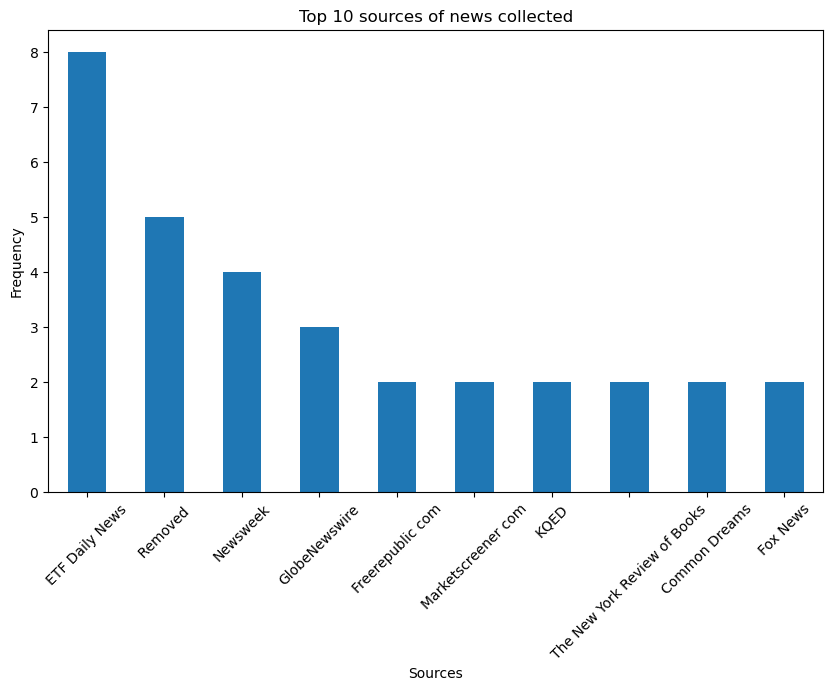

In [38]:
top_10 = df['source'].value_counts().head(10) #Top 10 sources

# Plotting histogram of them
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar')
plt.title('Top 10 sources of news collected')
plt.xlabel('Sources')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The news sources listed as well as the top 10 sources consists of names like ABC News, Los Angeles Times, CNN, Time, Fox News and much more which are quite famous and so we can say that data is credible or atleast there are less chances that the news are some made up things just for the sake of increasing the view counts. Since the data is only 96 rows, its not enough to generate some conclusion or reach to a one...

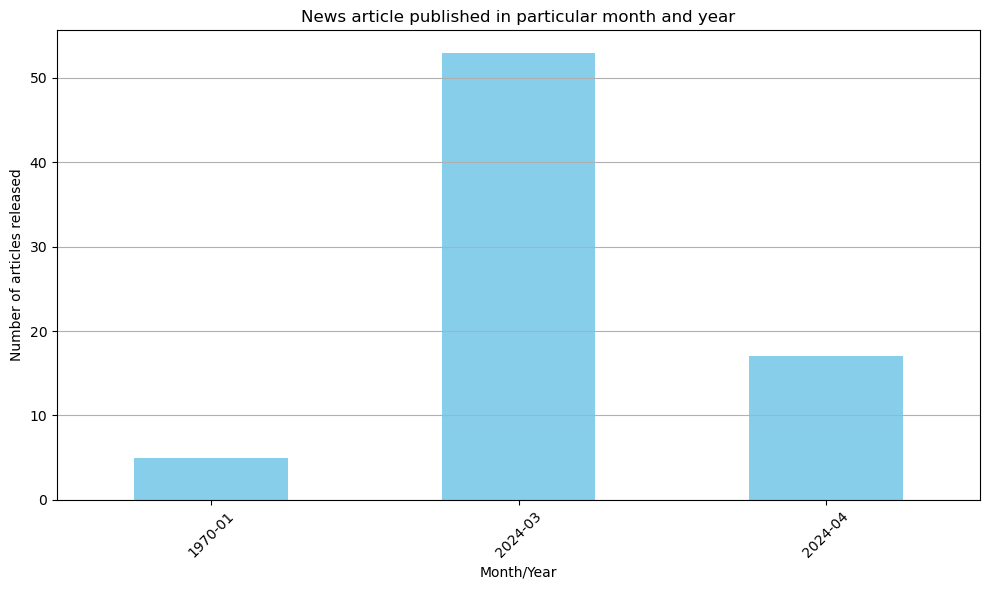

In [39]:
# Now lets see about the date on which these news were listed to know when these incidents happen
# We might also relate date as a factor of knowing that patients died on certain time span or what led to Asthma
# in California such a serious issue and form a conclusion.

df['month_year'] = df['date_published'].dt.to_period('M') #adding this so that we can sort by month-year

monthly_counts = df.groupby('month_year').size() #These counts the news article in a particular month

# Lets visualize this by line plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('News article published in particular month and year')
plt.xlabel('Month/Year')
plt.ylabel('Number of articles released')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Now, there are couple of things to notice or can make a path for our further analysis.
- One is there are couple of articles from Jan 1970, which are mostly outliers and can be neglected as they won't matter in the analysis or have any say in our analysis
- Majorly the data or the articles are from 2024 Jan and Feb. So we might wanna go towards past 5-10 years of data of Asthma patients or their effects to know how serious things were because having only 96 data points and that too only from 2024 Jan and Feb, doesn't tell us why Asthma in California is a major issue at the first place. Past 5-10 years of data can help us know how seriously people were affected, which age groups were affected and we can come to a conclusion based on that.

### Now, let's move to our next datasets. I am planning to import datasets of same time span which I found from data.gov specifically in California

So I got following datasets. Let's get them ready and do some visualizations!!
- Deaths from Asthma from 2014-2019
- Emergency department data on Asthma patients from 2015-2020

What each datasets provide and what are their significance, will be explained part by part and so let's begin!

1st dataset has time span of 2014-2019, but here we can assume as per the data given that things from 2014-2019 must have been same from 2015-2020 to form a conclusion.

In [2]:
# Let's start with deaths from asthma from 2014-2019
import pandas as pd
df_deaths = pd.read_csv('asthma-deaths-by-county-2014_2019.csv', encoding='latin1')
df_deaths.head()

,COUNTY,YEARS,STRATA,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT
0,California,2014-2016,Total population,All ages,"1,181",9.6,NaN
1,Alameda,2014-2016,Total population,All ages,58,11.2,NaN
2,Alpine,2014-2016,Total population,All ages,0,0.0,NaN
3,Amador,2014-2016,Total population,All ages,0,0.0,NaN
4,Butte,2014-2016,Total population,All ages,7,NaN,Rate not available due to statistical instability


### Let's know more about this dataset.
- County is basically the areas in California
- Years is basically in the time span of. For example 2017-2019, the deaths are recorded in this time span
- Strata column is not needed for our analysis
- Age group. So, for each 3 year time span, they have divided the deaths in 3 age groups - All ages(Adults plus non adults), 0-17(Not adult), 18+(adults) for each area
- Number of deaths which depict the actual number recorded
- Age adjusted mortality rate is basically mortality rate overall in that particularly age group. For example, age mortality for specific group is 9, therfore 9 of 1000 people died in that specific age group due to asthma
- Comment section won't be needed in this analysis.

In [3]:
# Let's remove Strata and comment section from this analysis
df_deaths.drop(columns = ['STRATA','COMMENT'],inplace=True)
df_deaths

,COUNTY,YEARS,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
0,California,2014-2016,All ages,"1,181",9.6
1,Alameda,2014-2016,All ages,58,11.2
2,Alpine,2014-2016,All ages,0,0.0
3,Amador,2014-2016,All ages,0,0.0
4,Butte,2014-2016,All ages,7,NaN
...,...,...,...,...,...
349,Tulare,2017-2019,18+ years,16,15.5
350,Tuolumne,2017-2019,18+ years,NaN,NaN
351,Ventura,2017-2019,18+ years,17,7.7
352,Yolo,2017-2019,18+ years,NaN,NaN


In [4]:
# Let's start cleaning. 
df_deaths.dtypes #number of deaths should be integer

COUNTY                          object
YEARS                           object
AGE GROUP                       object
NUMBER OF DEATHS                object
AGE-ADJUSTED MORTALITY RATE    float64
dtype: object

In [5]:
df_deaths['NUMBER OF DEATHS'] = df_deaths['NUMBER OF DEATHS'].str.replace(',','').fillna(0).astype(int)  #Replacing the commas and filling NA's with 0

In [6]:
df_deaths

,COUNTY,YEARS,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
0,California,2014-2016,All ages,1181,9.6
1,Alameda,2014-2016,All ages,58,11.2
2,Alpine,2014-2016,All ages,0,0.0
3,Amador,2014-2016,All ages,0,0.0
4,Butte,2014-2016,All ages,7,NaN
...,...,...,...,...,...
349,Tulare,2017-2019,18+ years,16,15.5
350,Tuolumne,2017-2019,18+ years,0,NaN
351,Ventura,2017-2019,18+ years,17,7.7
352,Yolo,2017-2019,18+ years,0,NaN


In [7]:
# Since we replaced the number of deaths having NA values with 0. Let's first deal with it
# Let's see if we can replace it with mean or median
mn = df_deaths.groupby('AGE GROUP')['NUMBER OF DEATHS'].mean()
md = df_deaths.groupby('AGE GROUP')['NUMBER OF DEATHS'].median()

In [8]:
print("Mean is :", mn)
print("\n\nMedian is :",md)  #Therefore mean seems to be a good method.

Mean is : AGE GROUP
0-17 years     1.000000
18+ years     37.415254
All ages      38.949153
Name: NUMBER OF DEATHS, dtype: float64


Median is : AGE GROUP
0-17 years    0.0
18+ years     3.0
All ages      6.0
Name: NUMBER OF DEATHS, dtype: float64


We are moving with mean in this case as we cannot for data retrival team to do the work properly. But in this case, we should always contact the team to provide or change the method of data retrival, as we can clearly see, that data collected from 0-17 age group has mostly 0 values which is not accurate but in this case we replace by mean so that data can be ready for analysis. But the analysis can be better if that data retrival or provided would be better

In [9]:
def fill_zeros(row):  #making a function to fill with age group mean, if found 0 in a particular age group mean
    if row['NUMBER OF DEATHS'] == 0:
        return mn[row['AGE GROUP']]
    else:
        return row['NUMBER OF DEATHS']

# Applying the function
df_deaths['NUMBER OF DEATHS'] = df_deaths.apply(fill_zeros, axis=1)

df_deaths['NUMBER OF DEATHS'] = df_deaths['NUMBER OF DEATHS'].round().astype(int)

In [10]:
df_deaths

,COUNTY,YEARS,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
0,California,2014-2016,All ages,1181,9.6
1,Alameda,2014-2016,All ages,58,11.2
2,Alpine,2014-2016,All ages,39,0.0
3,Amador,2014-2016,All ages,39,0.0
4,Butte,2014-2016,All ages,7,NaN
...,...,...,...,...,...
349,Tulare,2017-2019,18+ years,16,15.5
350,Tuolumne,2017-2019,18+ years,37,NaN
351,Ventura,2017-2019,18+ years,17,7.7
352,Yolo,2017-2019,18+ years,37,NaN


In [11]:
# Now lets deal with age adjusted mortality rate in the same manner

mn1 = df_deaths.groupby('AGE GROUP')['AGE-ADJUSTED MORTALITY RATE'].mean()
md1 = df_deaths.groupby('AGE GROUP')['AGE-ADJUSTED MORTALITY RATE'].median()

In [12]:
print("Mean is :", mn1)
print("\n\nMedian is :",md1)  #Therefore mean seems to be a good method again.

#Again if we could have, we would have asked the data retrieval to be done properly

Mean is : AGE GROUP
0-17 years     0.073864
18+ years     10.732759
All ages       8.218966
Name: AGE-ADJUSTED MORTALITY RATE, dtype: float64


Median is : AGE GROUP
0-17 years     0.00
18+ years     11.90
All ages       9.05
Name: AGE-ADJUSTED MORTALITY RATE, dtype: float64


In [13]:
import math
def fill_zeros1(row):  #making similar function
    if row['AGE-ADJUSTED MORTALITY RATE'] == 0 or math.isnan(row['AGE-ADJUSTED MORTALITY RATE']):
        return mn1[row['AGE GROUP']]
    else:
        return row['AGE-ADJUSTED MORTALITY RATE']

# Applying the function
df_deaths['AGE-ADJUSTED MORTALITY RATE'] = df_deaths.apply(fill_zeros1, axis=1)

df_deaths['AGE-ADJUSTED MORTALITY RATE'] = round(df_deaths['AGE-ADJUSTED MORTALITY RATE'],2) #rounding up to 2 decimals

In [14]:
df_deaths.head()

,COUNTY,YEARS,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
0,California,2014-2016,All ages,1181,9.60
1,Alameda,2014-2016,All ages,58,11.20
2,Alpine,2014-2016,All ages,39,8.22
3,Amador,2014-2016,All ages,39,8.22
4,Butte,2014-2016,All ages,7,8.22


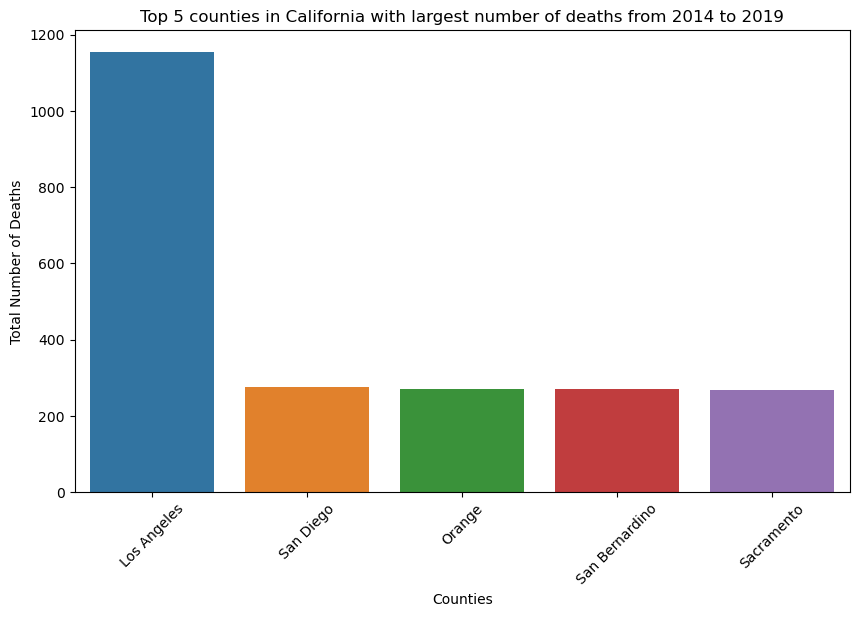

In [15]:
#Now lets visualize this.

#Let's see which are the top 5 counties in California having largest number of deaths
import matplotlib.pyplot as plt
import seaborn as sns

county_deaths = df_deaths.groupby('COUNTY')['NUMBER OF DEATHS'].sum().reset_index()
top_counties = county_deaths.sort_values(by='NUMBER OF DEATHS', ascending=False)
top5 = top_counties.iloc[1:6] #doing this because California is a State and we want it's county's data 

# Plotting it now
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTY', y='NUMBER OF DEATHS', data=top5)
plt.title('Top 5 counties in California with largest number of deaths from 2014 to 2019')
plt.xlabel('Counties')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)
plt.show()

Also seen in previous dataset Los Angeles is some place where the Asthma has affected a lot in past years as well and so the number of deaths are high in Los Angeles due to Asthma from 2014-2019

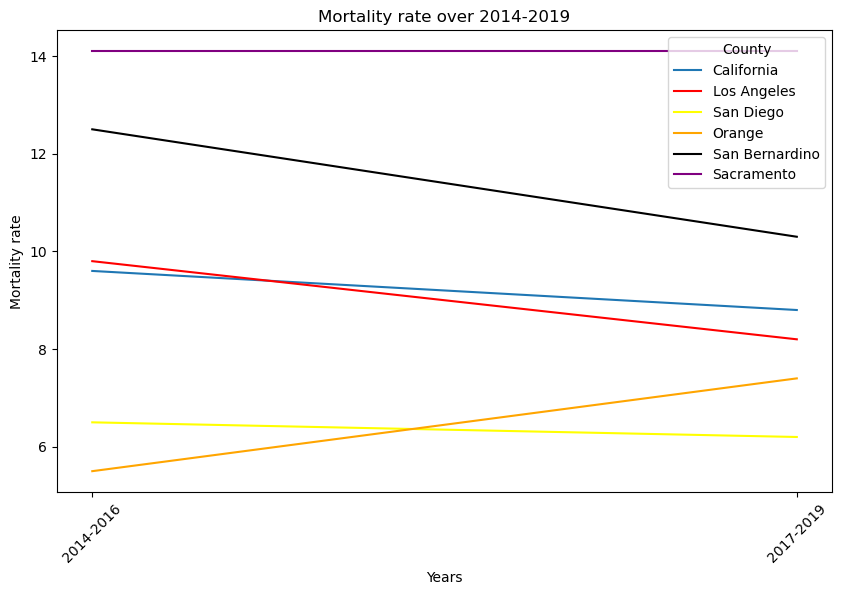

In [15]:
# Now we wanna see the Mortality rate over the years from 2014-2019 for California as a whole and top 5 counties
# Is it increased or decreased?

cali_data = df_deaths[(df_deaths['COUNTY'] == 'California') & (df_deaths['AGE GROUP'] == 'All ages')]
la_data = df_deaths[(df_deaths['COUNTY'] == 'Los Angeles') & (df_deaths['AGE GROUP'] == 'All ages')]
sd_data = df_deaths[(df_deaths['COUNTY'] == 'San Diego') & (df_deaths['AGE GROUP'] == 'All ages')]
o_data = df_deaths[(df_deaths['COUNTY'] == 'Orange') & (df_deaths['AGE GROUP'] == 'All ages')]
sb_data = df_deaths[(df_deaths['COUNTY'] == 'San Bernardino') & (df_deaths['AGE GROUP'] == 'All ages')]
sc_data = df_deaths[(df_deaths['COUNTY'] == 'Sacramento') & (df_deaths['AGE GROUP'] == 'All ages')]

plt.figure(figsize=(10, 6))
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=cali_data, label = 'California')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=la_data, color = 'red', label = 'Los Angeles')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=sd_data, color = 'yellow', label = 'San Diego')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=o_data, color = 'orange', label = 'Orange')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=sb_data, color = 'black', label = 'San Bernardino')
sns.lineplot(x='YEARS', y='AGE-ADJUSTED MORTALITY RATE', data=sc_data, color = 'purple', label = 'Sacramento')
plt.title('Mortality rate over 2014-2019')
plt.xlabel('Years')
plt.ylabel('Mortality rate')
plt.xticks(rotation=45)
plt.legend(title='County')
plt.show()

Now we can see that California as a whole has decreased its number of Deaths from 2014-2019, but not by a lot. Same thing goes for Los Angeles and San Bernardino. While the mortality rate was stagnant for San Diego and Sacramento, it increased for Orange county.

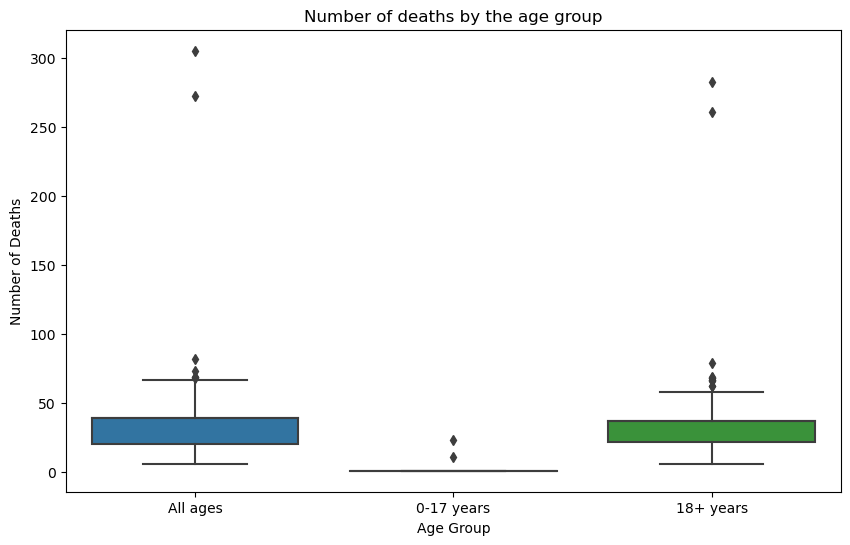

In [16]:
df_only_counties = df_deaths[df_deaths['COUNTY'] != 'California'] #We only want counties data

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE GROUP', y='NUMBER OF DEATHS', data=df_only_counties)
plt.title('Number of deaths by the age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.show()

Usually we can see that mostly the number of deaths lie from 0-80 with most of them being deaths of adults and some deaths in age group 0-17 years from 2014-2019. This can be misleading as well as we substituted most of the values in age group 0-17 age group

### Now, let's move to our next dataset - Emergency department data on Asthma patients from 2015-2020

In [16]:
import pandas as pd
df_ed = pd.read_csv('asthma-emergency-department-visit-rates-by-county-2015_2020.csv', encoding='latin1')
df_ed.head()

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE,COMMENT
0,California,2015,Total population,All ages,All ages,"191,904",50.4,NaN
1,Alameda,2015,Total population,All ages,All ages,"9,939",64.3,NaN
2,Alpine,2015,Total population,All ages,All ages,0,0.0,NaN
3,Amador,2015,Total population,All ages,All ages,196,58.4,NaN
4,Butte,2015,Total population,All ages,All ages,"1,044",50.2,NaN


In [17]:
# We dont want STRATA, STRATA NAME and COMMENT for analysis
df_ed.drop(columns = ['STRATA','STRATA NAME','COMMENT'],inplace=True)
df_ed

,COUNTY,YEAR,AGE GROUP,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE
0,California,2015,All ages,"191,904",50.4
1,Alameda,2015,All ages,"9,939",64.3
2,Alpine,2015,All ages,0,0.0
3,Amador,2015,All ages,196,58.4
4,Butte,2015,All ages,"1,044",50.2
...,...,...,...,...,...
4479,Tulare,2020,All ages,NaN,NaN
4480,Tuolumne,2020,All ages,0,0.0
4481,Ventura,2020,All ages,14,8.7
4482,Yolo,2020,All ages,11,NaN


In [18]:
df_ed.dtypes #We want Number of ED visits as integers

COUNTY                         object
YEAR                            int64
AGE GROUP                      object
NUMBER OF ED VISITS            object
AGE-ADJUSTED ED VISIT RATE    float64
dtype: object

In [19]:
df_ed.isna().sum() #We want to get rid of these missing values. Since its around 15% of the data and we want to avoid
# what happenend last time, this time we will drop it

COUNTY                          0
YEAR                            0
AGE GROUP                       0
NUMBER OF ED VISITS           681
AGE-ADJUSTED ED VISIT RATE    716
dtype: int64

In [20]:
df_ed.dropna(inplace = True)

In [21]:
df_ed.isna().sum() #The null values are removed. Now lets change the data types

COUNTY                        0
YEAR                          0
AGE GROUP                     0
NUMBER OF ED VISITS           0
AGE-ADJUSTED ED VISIT RATE    0
dtype: int64

In [22]:
df_ed['NUMBER OF ED VISITS'] = df_ed['NUMBER OF ED VISITS'].str.replace(',','').astype(int)

In [23]:
df_ed.dtypes

COUNTY                         object
YEAR                            int64
AGE GROUP                      object
NUMBER OF ED VISITS             int32
AGE-ADJUSTED ED VISIT RATE    float64
dtype: object

In [24]:
df_ed['AGE GROUP'].unique()

array(['All ages', '0\x9617 years', '18+ years', '0\x964 years',
       '5\x9617 years', '18\x9664 years', '65+ years'], dtype=object)

In [25]:
df_ed['AGE GROUP'] = df_ed['AGE GROUP'].str.replace('\x96','-')

In [26]:
df_ed['AGE GROUP'].unique()

array(['All ages', '0-17 years', '18+ years', '0-4 years', '5-17 years',
       '18-64 years', '65+ years'], dtype=object)

In [27]:
df_ed = df_ed[df_ed['NUMBER OF ED VISITS'] != 0]

In [28]:
df_ed.head()

,COUNTY,YEAR,AGE GROUP,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE
0,California,2015,All ages,191904,50.4
1,Alameda,2015,All ages,9939,64.3
3,Amador,2015,All ages,196,58.4
4,Butte,2015,All ages,1044,50.2
5,Calaveras,2015,All ages,185,48.0


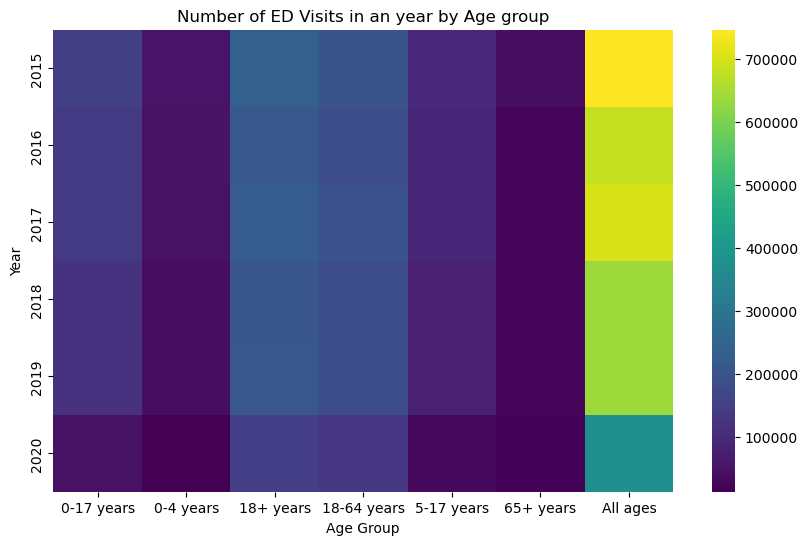

In [30]:
#The data is clean. Let's visualize now
#Lets see the number of ED visits for each age group from 2015 to 2020
pivot_table = df_ed.pivot_table(index='YEAR', columns='AGE GROUP', values='NUMBER OF ED VISITS', aggfunc=sum)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Number of ED Visits in an year by Age group')
plt.xlabel('Age Group')
plt.ylabel('Year')
plt.show()

All ages is basically sum of the ages, so it is but obvious that it has highest ED visits. Now, apart from this we can see that 18+ and 18-64 years have highest ED visits as also proved from above. While, 0-4 years and 65+ age group people are almost similar visits and the least among the given age groups.

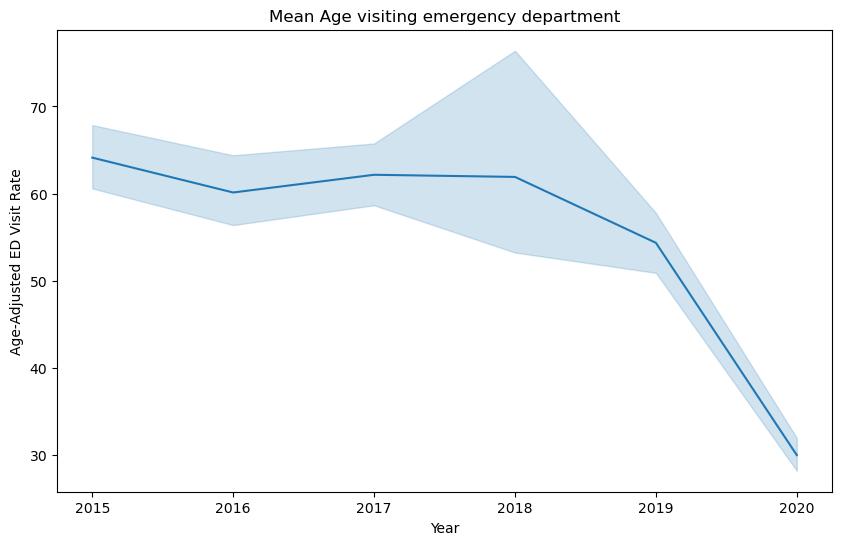

In [31]:
# Lets see the mean age of visiting an emergency department
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='AGE-ADJUSTED ED VISIT RATE', data=df_ed)
plt.title('Mean Age visiting emergency department')
plt.xlabel('Year')
plt.ylabel('Age-Adjusted ED Visit Rate')
plt.show()

We can see that the rate remained almost same and a little less when moving from 2018 to 2019. Afte that it sharply decreased. But here one more factor of COVID comes into play. There is a possiblity that even though people were having issues, they avoided going to hospitals.

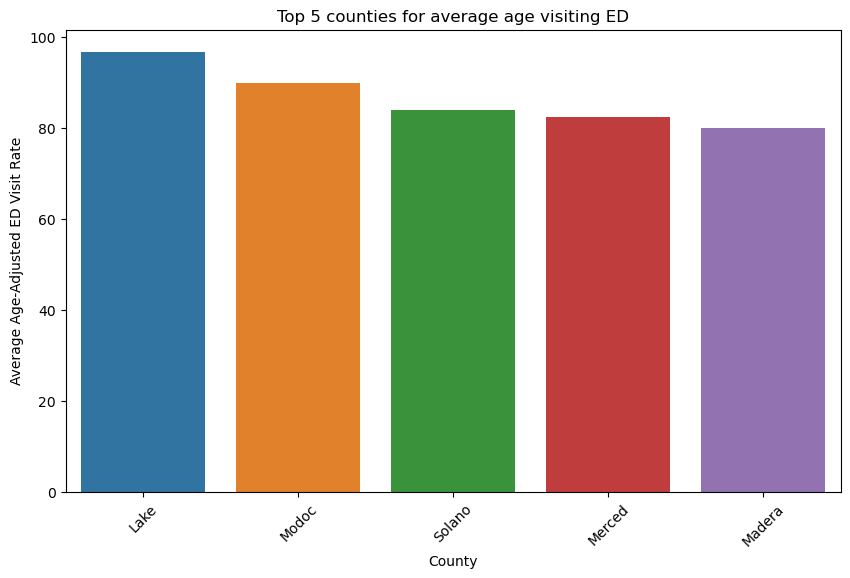

In [32]:
# For top 5 counties, I am counting the average age coming to ED

county_avg_rate = df_ed.groupby('COUNTY')['AGE-ADJUSTED ED VISIT RATE'].mean().reset_index()

top_counties = county_avg_rate.sort_values(by='AGE-ADJUSTED ED VISIT RATE', ascending=False)
top5 = top_counties.iloc[1:6]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTY', y='AGE-ADJUSTED ED VISIT RATE', data=top5, order=top5['COUNTY'])
plt.title('Top 5 counties for average age visiting ED')
plt.xlabel('County')
plt.ylabel('Average Age-Adjusted ED Visit Rate')
plt.xticks(rotation=45)
plt.show()

These are the top 5 counties with their average age visiting EDs and most of them have their average age more than 65.

In [30]:
df_deaths[df_deaths['COUNTY'] != 'California']

,COUNTY,YEARS,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
1,Alameda,2014-2016,All ages,58,11.20
2,Alpine,2014-2016,All ages,39,8.22
3,Amador,2014-2016,All ages,39,8.22
4,Butte,2014-2016,All ages,7,8.22
5,Calaveras,2014-2016,All ages,39,8.22
...,...,...,...,...,...
349,Tulare,2017-2019,18+ years,16,15.50
350,Tuolumne,2017-2019,18+ years,37,10.73
351,Ventura,2017-2019,18+ years,17,7.70
352,Yolo,2017-2019,18+ years,37,10.73


In [31]:
df_deaths.describe()

,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE
count,354.000000,354.000000
mean,38.446328,7.107486
std,124.128936,5.693896
min,1.000000,0.070000
25%,1.000000,0.070000
50%,22.500000,8.220000
75%,39.000000,10.730000
max,1181.000000,27.600000


In [32]:
df_deaths['YEARS'].unique()

array(['2014-2016', '2017-2019'], dtype=object)

In [33]:
df_deaths['AGE GROUP'].unique()

array(['All ages', '0-17 years', '18+ years'], dtype=object)

In [34]:
# Converting the years column and age group column into numerical from categorical

age_group_mapping = {'All ages': 0, '0-17 years': 1, '18+ years': 2}

# Apply mapping to the 'AGE GROUP' column
df_deaths['NUMERIC AGE GROUP'] = df_deaths['AGE GROUP'].map(age_group_mapping)

years_mapping = {'2014-2016': 0, '2017-2019': 1}

# Apply mapping to the 'YEARS' column
df_deaths['NUMERIC YEARS'] = df_deaths['YEARS'].map(years_mapping)

df_deaths.head()

,COUNTY,YEARS,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,NUMERIC AGE GROUP,NUMERIC YEARS
0,California,2014-2016,All ages,1181,9.60,0,0
1,Alameda,2014-2016,All ages,58,11.20,0,0
2,Alpine,2014-2016,All ages,39,8.22,0,0
3,Amador,2014-2016,All ages,39,8.22,0,0
4,Butte,2014-2016,All ages,7,8.22,0,0


In [35]:
# First row for each age group is summation of all deaths and overall age-adjusted mortality rate. We need to omit that
# as it would create baisness.

df_deaths1 = df_deaths[df_deaths['COUNTY'] != 'California']
df_deaths1.head()

,COUNTY,YEARS,AGE GROUP,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,NUMERIC AGE GROUP,NUMERIC YEARS
1,Alameda,2014-2016,All ages,58,11.20,0,0
2,Alpine,2014-2016,All ages,39,8.22,0,0
3,Amador,2014-2016,All ages,39,8.22,0,0
4,Butte,2014-2016,All ages,7,8.22,0,0
5,Calaveras,2014-2016,All ages,39,8.22,0,0


In [36]:
# before dealing with outliers
df_deaths1.describe()

,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,NUMERIC AGE GROUP,NUMERIC YEARS
count,348.000000,348.000000,348.000000,348.00000
mean,25.609195,7.100144,1.000000,0.50000
std,34.205636,5.713607,0.817672,0.50072
min,1.000000,0.070000,0.000000,0.00000
25%,1.000000,0.070000,0.000000,0.00000
50%,20.500000,8.220000,1.000000,0.50000
75%,39.000000,10.730000,2.000000,1.00000
max,305.000000,27.600000,2.000000,1.00000


In [37]:
df_ed.head()

,COUNTY,YEAR,AGE GROUP,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE
0,California,2015,All ages,191904,50.4
1,Alameda,2015,All ages,9939,64.3
3,Amador,2015,All ages,196,58.4
4,Butte,2015,All ages,1044,50.2
5,Calaveras,2015,All ages,185,48.0


In [38]:
df_ed.describe()

,YEAR,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE
count,3489.000000,3489.000000,3489.000000
mean,2017.505589,2194.580396,55.513414
std,1.704532,10483.701598,74.511910
min,2015.000000,12.000000,5.000000
25%,2016.000000,62.000000,28.100000
50%,2018.000000,259.000000,42.900000
75%,2019.000000,993.000000,64.500000
max,2020.000000,191904.000000,3531.000000


### Lets create 2 more columns with categorical values(AGE GROUP and YEAR) being transformed to numerical values.
### Remove the california row as it would create biasness and then do the same thing as above

In [39]:
df_ed['YEAR'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [40]:
df_ed['AGE GROUP'].unique()

array(['All ages', '0-17 years', '18+ years', '0-4 years', '5-17 years',
       '18-64 years', '65+ years'], dtype=object)

In [41]:
year_mapping = {2015: 0, 2016: 1, 2017: 2, 2018: 3, 2019: 4, 2020: 5}

# Apply mapping to the 'YEARS' column
df_ed['NUMERIC YEAR'] = df_ed['YEAR'].map(year_mapping)

age_group_mapping = {'All ages': 0, '0-17 years': 1, '18+ years': 2, '0-4 years': 3, '5-17 years': 4,
       '18-64 years': 5, '65+ years': 6}

# Apply mapping to the 'AGE GROUP' column
df_ed['NUMERIC AGE GROUP'] = df_ed['AGE GROUP'].map(age_group_mapping)

df_ed.head()

C:\Users\kalpm\AppData\Local\Temp\ipykernel_11116\694938273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed['NUMERIC YEAR'] = df_ed['YEAR'].map(year_mapping)
C:\Users\kalpm\AppData\Local\Temp\ipykernel_11116\694938273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed['NUMERIC AGE GROUP'] = df_ed['AGE GROUP'].map(age_group_mapping)


,COUNTY,YEAR,AGE GROUP,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE,NUMERIC YEAR,NUMERIC AGE GROUP
0,California,2015,All ages,191904,50.4,0,0
1,Alameda,2015,All ages,9939,64.3,0,0
3,Amador,2015,All ages,196,58.4,0,0
4,Butte,2015,All ages,1044,50.2,0,0
5,Calaveras,2015,All ages,185,48.0,0,0


In [42]:
df_ed1 = df_ed[df_ed['COUNTY'] != 'California']
df_ed1.head()

,COUNTY,YEAR,AGE GROUP,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE,NUMERIC YEAR,NUMERIC AGE GROUP
1,Alameda,2015,All ages,9939,64.3,0,0
3,Amador,2015,All ages,196,58.4,0,0
4,Butte,2015,All ages,1044,50.2,0,0
5,Calaveras,2015,All ages,185,48.0,0,0
6,Colusa,2015,All ages,97,41.4,0,0


In [43]:
df_ed1.describe()

,YEAR,NUMBER OF ED VISITS,AGE-ADJUSTED ED VISIT RATE,NUMERIC YEAR,NUMERIC AGE GROUP
count,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000
mean,2017.503369,1117.126282,55.603076,2.503369,1.886610
std,1.704006,3170.231469,75.130637,1.704006,2.132284
min,2015.000000,12.000000,5.000000,0.000000,0.000000
25%,2016.000000,61.000000,28.100000,1.000000,0.000000
50%,2018.000000,233.000000,43.000000,3.000000,1.000000
75%,2019.000000,907.000000,64.500000,4.000000,4.000000
max,2020.000000,52227.000000,3531.000000,5.000000,6.000000
